In [422]:
# Used for plotting data
%matplotlib inline
import matplotlib.pyplot as plt
# Used for data storage and manipulation 
import numpy as np
import pandas as pd
# Used for Regression Modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# Used for Acc metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# For stepwise regression
import statsmodels.api as sm
# box plots
import seaborn as sns
# pairplot
from seaborn import pairplot
# Correlation plot
from statsmodels.graphics.correlation import plot_corr

In [423]:
df = pd.read_csv("dataCSV_v2.csv", low_memory=False, delimiter=';')
pd.options.display.max_columns = None
df = df.drop(columns=['Self identification ', 'Spierpercentage ', 'Fat percentage ', 'Botmassa'])
df = df.dropna(subset=['RFMTmean', 'RFCSAmean', 'RFEImean', 'VLMTmean', 'VLCSAmean', 'VLEImean'])
df = df[df.isnull().sum(axis=1) < 4]
df = df.fillna(0)
df = df.astype(str)
df = df.apply(lambda x: x.str.replace('#LEEG!','0'))
df = df.apply(lambda x: x.str.replace('-99','0'))
df = df.apply(lambda x: x.str.replace('-96','0'))
df = df.apply(lambda x: x.str.replace(',','.'))
df = df.astype(float)
df = df[df.RFMTmean != 0]
df = df[df.RFCSAmean != 0]
df = df[df.RFEImean != 0]
df = df[df.VLMTmean != 0]
df = df[df.VLCSAmean != 0]
df = df[df.VLEImean != 0]
df.sample(20)

,volgcode,age_at_V1,BMI,BMI4category,V1_upperleg_length,V1_upperleg_cir,TMTBminA,TMTBdeelA,V2_TMT_partA,V2_TMT_partB,V2_SCWT_score,V2_LFT_score,RFMTmean,RFCSAmean,RFEImean,VLMTmean,VLCSAmean,VLEImean,RV2_TMT_A,RV2_TMT_B,RV2_SCWT,RV2_LFT_,RTMTBmin,RTMTBdee,MeanCognitive,Gender,Leefsituatie,Educatie,Roken,Metabolic age
22,110038.0,80.0,21.4,2.0,39.4,45.0,124.0,3.95,42.0,166.0,49.5,40.0,0.573,3.051,47.864,1.873,13.124,57.888,0.6379,0.6747,0.4186,0.6264,0.6928,0.6627,0.62,0.0,1.0,3.0,3.0,65.0
62,110078.0,78.0,24.9,2.0,37.1,46.7,69.0,2.05,66.0,135.0,71.5,23.0,1.334,4.343,63.293,1.922,15.490,62.743,0.9770,0.6265,0.7558,0.1494,0.5542,0.2771,0.56,1.0,1.0,5.0,3.0,63.0
99,110115.0,77.0,34.8,4.0,38.0,62.0,82.0,3.28,36.0,118.0,64.0,39.0,0.441,2.140,71.610,1.534,7.790,64.631,0.4598,0.5783,0.6337,0.5747,0.5783,0.6024,0.57,0.0,1.0,0.0,2.0,74.0
72,110088.0,75.0,20.3,2.0,39.7,46.2,25.0,2.56,16.0,41.0,40.0,53.0,1.119,4.262,60.171,1.590,14.338,60.117,0.0115,0.0181,0.3140,0.8908,0.1205,0.4819,0.31,0.0,0.0,3.0,3.0,60.0
76,110092.0,72.0,39.0,4.0,42.0,62.5,22.0,1.69,32.0,54.0,57.5,33.0,1.669,9.368,57.913,2.112,24.229,55.349,0.3276,0.0904,0.5581,0.3621,0.0964,0.1325,0.26,0.0,0.0,3.0,3.0,87.0
4,110020.0,69.0,24.1,2.0,37.5,42.2,124.0,3.34,53.0,177.0,95.0,39.0,0.953,1.629,56.433,2.176,14.070,50.510,0.8161,0.7289,0.8721,0.5747,0.6928,0.6145,0.72,0.0,0.0,3.0,3.0,54.0
26,110042.0,72.0,31.2,4.0,38.0,61.8,232.0,11.09,23.0,255.0,49.5,37.0,1.294,3.714,52.882,2.556,20.267,42.923,0.0805,0.8675,0.4186,0.5000,0.8976,0.9880,0.63,0.0,1.0,4.0,2.0,70.0
44,110060.0,71.0,24.1,2.0,44.6,50.2,45.0,2.41,32.0,77.0,49.5,32.0,1.002,5.671,61.812,1.816,13.377,65.185,0.3276,0.3614,0.4186,0.3448,0.3916,0.4337,0.38,0.0,1.0,4.0,2.0,56.0
84,110100.0,70.0,23.7,2.0,39.5,45.3,31.0,1.76,41.0,72.0,30.0,39.0,1.051,3.698,61.429,2.158,11.295,69.172,0.6034,0.2892,0.0756,0.5747,0.2169,0.1446,0.32,0.0,1.0,3.0,2.0,63.0
6,110022.0,83.0,25.7,3.0,37.2,48.4,45.0,2.02,44.0,89.0,118.0,35.0,0.820,3.039,68.756,2.071,16.011,52.035,0.7069,0.4337,0.9302,0.4253,0.3916,0.2530,0.52,1.0,0.0,2.0,3.0,67.0


In [424]:
X = pd.DataFrame(df, columns = ['volgcode', 'Gender ', 'Leefsituatie ', 'Educatie ', 'Roken ', 'Metabolic age ', 'age_at_V1', 'BMI','BMI4category', 'V1_upperleg_length', 'V1_upperleg_cir', 'V2_TMT_partA', 'V2_TMT_partB', 'V2_SCWT_score', 'V2_LFT_score'])
y = pd.DataFrame(df, columns=['RFMTmean'])
y2 = pd.DataFrame(df, columns=['RFCSAmean'])
y3 = pd.DataFrame(df, columns=['RFEImean'])
y4 = pd.DataFrame(df, columns=['VLMTmean'])
y5 = pd.DataFrame(df, columns=['VLCSAmean'])
y6 = pd.DataFrame(df, columns=['VLEImean'])

# RFMTmean

In [425]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Create linear regression model
lin_reg_mod = LinearRegression()
# Fit linear regression
lin_reg_mod.fit(X_train, y_train)
# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [426]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)
# The closer towards 1, the better the fit
print(test_set_r2)

0.12537028920034532


In [427]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

0.28595560187725305


In [428]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['RFMTmean']) - abs(df_results['Predicted'])
print(df_results)

     RFMTmean  Predicted  Residuals
46      1.316   0.970302   0.345698
53      1.290   1.010522   0.279478
32      0.711   1.169419  -0.458419
48      1.517   1.227547   0.289453
43      1.156   1.025801   0.130199
98      1.133   1.149906  -0.016906
71      1.034   1.222630  -0.188630
82      1.440   1.074370   0.365630
103     1.082   1.080928   0.001072
69      1.083   1.329044  -0.246044
80      1.619   1.410926   0.208074
63      1.395   1.019073   0.375927
57      0.652   0.960705  -0.308705
79      0.756   1.122561  -0.366561
76      1.669   1.332457   0.336543
13      1.572   1.353830   0.218170
2       0.744   1.075163  -0.331163
42      1.094   0.892530   0.201470
81      1.055   1.285618  -0.230618
54      1.285   1.228335   0.056665
23      0.976   1.062984  -0.086984
94      1.659   1.138421   0.520579


<ipython-input-428-d76d1299e5ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-428-d76d1299e5ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['RFMTmean']) - abs(df_results['Predicted'])


Text(0.5, 1.0, 'Actual vs. Predicted')

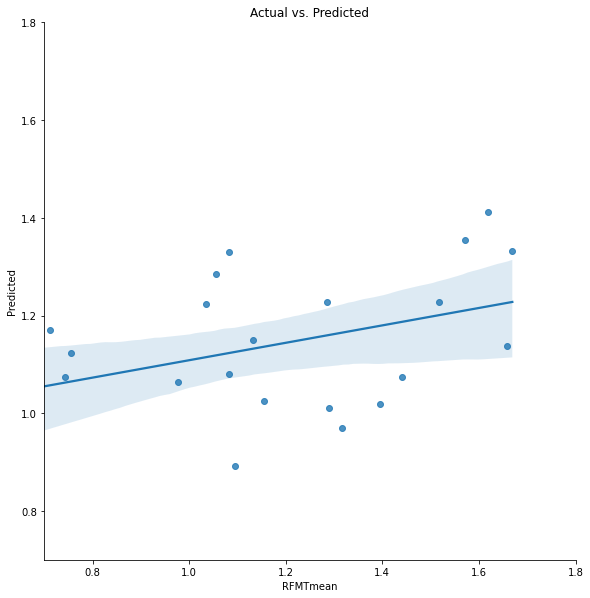

In [429]:
# Plotting the actual vs predicted values
sns.lmplot(x='RFMTmean', y='Predicted', data=df_results, height=8).set(ylim=(0.7, 1.8), xlim=(0.7, 1.8))

plt.title('Actual vs. Predicted')

# RFCSAmean

In [430]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=1)
# Create linear regression model
lin_reg_mod = LinearRegression()
# Fit linear regression
lin_reg_mod.fit(X_train, y_train)
# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [431]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)
# The closer towards 1, the better the fit
print(test_set_r2)

0.3550839115228872


In [432]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

1.6195339209886532


In [433]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['RFCSAmean']) - abs(df_results['Predicted'])
print(df_results)

     RFCSAmean  Predicted  Residuals
46       4.522   4.024269   0.497731
53       4.874   2.612395   2.261605
32       1.300   4.962569  -3.662569
48       6.920   5.759063   1.160937
43       4.404   3.777808   0.626192
98       3.848   4.034798  -0.186798
71       2.391   4.529034  -2.138034
82       5.429   4.331479   1.097521
103      3.381   3.631025  -0.250025
69       3.682   4.963186  -1.281186
80       5.289   4.489295   0.799705
63       4.360   4.428049  -0.068049
57       2.182   3.388682  -1.206682
79       3.650   4.083582  -0.433582
76       9.368   6.218426   3.149574
13       7.365   5.220060   2.144940
2        1.993   1.999924  -0.006924
42       3.652   3.522283   0.129717
81       2.618   4.533651  -1.915651
54       6.204   6.521874  -0.317874
23       1.543   3.853277  -2.310277
94       6.783   4.849542   1.933458


<ipython-input-433-878abcb5ebb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-433-878abcb5ebb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['RFCSAmean']) - abs(df_results['Predicted'])


Text(0.5, 1.0, 'Actual vs. Predicted')

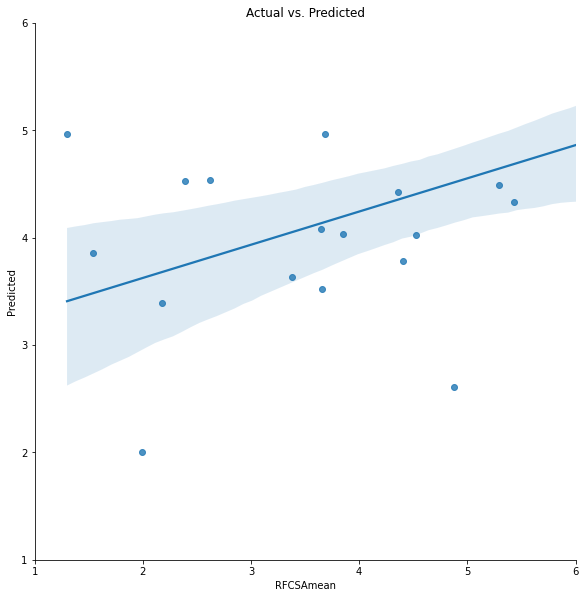

In [434]:
# Plotting the actual vs predicted values
sns.lmplot(x='RFCSAmean', y='Predicted', data=df_results, height=8).set(ylim=(1, 6), xlim=(1, 6))
plt.title('Actual vs. Predicted')

# RFEImean

In [435]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y3, random_state=1)
# Create linear regression model
lin_reg_mod = LinearRegression()
# Fit linear regression
lin_reg_mod.fit(X_train, y_train)
# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [436]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)
# The closer towards 1, the better the fit
print(test_set_r2)

0.17764575586390507


In [437]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

10.27347056603661


In [438]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['RFEImean']) - abs(df_results['Predicted'])
print(df_results)

     RFEImean  Predicted  Residuals
46     62.239  63.019544  -0.780544
53     62.505  61.064450   1.440550
32     76.445  55.133818  21.311182
48     56.324  54.728444   1.595556
43     71.163  63.595063   7.567937
98     54.118  63.449097  -9.331097
71     45.056  56.023760 -10.967760
82     61.369  65.580594  -4.211594
103    54.505  60.414426  -5.909426
69     74.372  55.969950  18.402050
80     53.167  49.023185   4.143815
63     56.594  62.616125  -6.022125
57     75.985  72.720914   3.264086
79     68.093  68.039867   0.053133
76     57.913  57.089518   0.823482
13     43.121  43.856521  -0.735521
2      48.469  54.042444  -5.573444
42     70.081  70.672459  -0.591459
81     65.247  64.891144   0.355856
54     37.282  55.452500 -18.170500
23     78.999  54.065868  24.933132
94     50.008  62.576425 -12.568425


<ipython-input-438-467e01ed1105>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-438-467e01ed1105>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['RFEImean']) - abs(df_results['Predicted'])


Text(0.5, 1.0, 'Actual vs. Predicted')

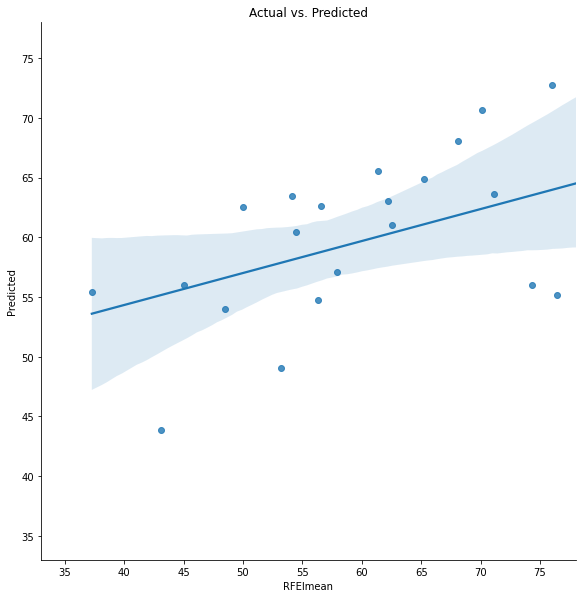

In [439]:
# Plotting the actual vs predicted values
sns.lmplot(x='RFEImean', y='Predicted', data=df_results, height=8).set(ylim=(33, 78), xlim=(33, 78))
plt.title('Actual vs. Predicted')

# VLMTmean

In [440]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y4, random_state=1)
# Create linear regression model
lin_reg_mod = LinearRegression()
# Fit linear regression
lin_reg_mod.fit(X_train, y_train)
# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [441]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)
# The closer towards 1, the better the fit
print(test_set_r2)

-0.5299486906660562


In [442]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

0.3962305634876004


In [443]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['VLMTmean']) - abs(df_results['Predicted'])
print(df_results)

     VLMTmean  Predicted  Residuals
46      1.571   1.822046  -0.251046
53      1.938   1.700478   0.237522
32      2.084   2.209683  -0.125683
48      1.930   2.056491  -0.126491
43      1.576   1.854606  -0.278606
98      1.682   1.659433   0.022567
71      1.696   1.873053  -0.177053
82      2.171   1.971524   0.199476
103     1.696   1.471426   0.224574
69      1.732   2.106384  -0.374384
80      2.263   2.124166   0.138834
63      2.667   1.695217   0.971783
57      2.240   1.769554   0.470446
79      2.130   1.987659   0.142341
76      2.112   2.084554   0.027446
13      2.712   1.963260   0.748740
2       1.798   2.328989  -0.530989
42      1.771   1.729527   0.041473
81      1.640   2.432365  -0.792365
54      1.831   1.996376  -0.165376
23      2.365   1.871024   0.493976
94      1.904   1.788191   0.115809


<ipython-input-443-b57ad001f371>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-443-b57ad001f371>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['VLMTmean']) - abs(df_results['Predicted'])


Text(0.5, 1.0, 'Actual vs. Predicted')

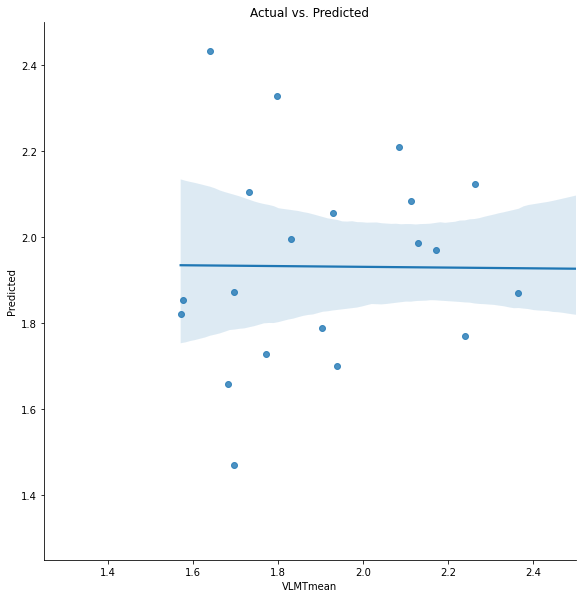

In [444]:
# Plotting the actual vs predicted values
sns.lmplot(x='VLMTmean', y='Predicted', data=df_results, height=8).set(ylim=(1.25, 2.5), xlim=(1.25, 2.5))
plt.title('Actual vs. Predicted')

# VLCSAmean

In [445]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y5, random_state=1)
# Create linear regression model
lin_reg_mod = LinearRegression()
# Fit linear regression
lin_reg_mod.fit(X_train, y_train)
# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [446]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)
# The closer towards 1, the better the fit
print(test_set_r2)

-0.43065925320396703


In [447]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

4.844958226922921


In [448]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['VLCSAmean']) - abs(df_results['Predicted'])
print(df_results)

     VLCSAmean  Predicted  Residuals
46      12.212  12.756681  -0.544681
53      13.212  13.122823   0.089177
32      18.304  15.191889   3.112111
48      14.370  14.437473  -0.067473
43      11.740  15.112273  -3.372273
98      10.853  13.533857  -2.680857
71       9.380  11.428109  -2.048109
82      18.273  12.237849   6.035151
103     10.446  11.735855  -1.289855
69      11.630  18.363070  -6.733070
80      16.301  15.997910   0.303090
63      15.933   8.672466   7.260534
57       8.310  11.076564  -2.766564
79      12.516  14.486870  -1.970870
76      24.229  13.701905  10.527095
13      19.668  12.592945   7.075055
2       12.384  17.299252  -4.915252
42       9.113  10.886311  -1.773311
81      13.607  16.858739  -3.251739
54      20.961  10.666660  10.294340
23      16.082  14.886676   1.195324
94      17.023  11.568798   5.454202


<ipython-input-448-66df4c25d7d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-448-66df4c25d7d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['VLCSAmean']) - abs(df_results['Predicted'])


Text(0.5, 1.0, 'Actual vs. Predicted')

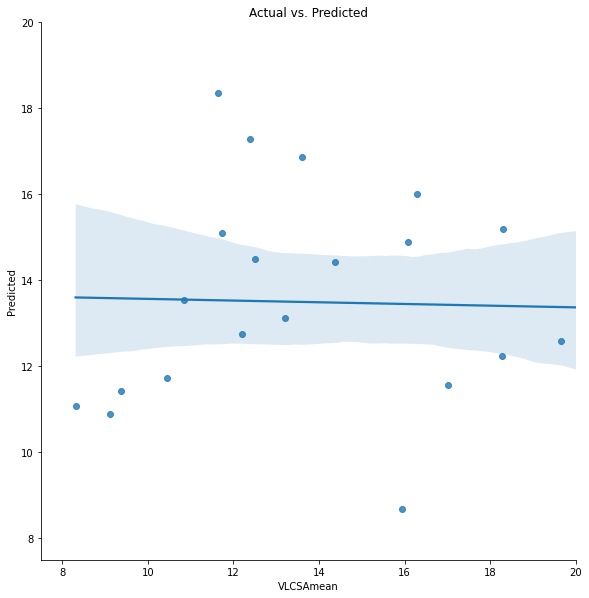

In [449]:
# Plotting the actual vs predicted values
sns.lmplot(x='VLCSAmean', y='Predicted', data=df_results, height=8).set(ylim=(7.5, 20), xlim=(7.5, 20))
plt.title('Actual vs. Predicted')

# VLEImean

In [454]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y6, random_state=1)
# Create linear regression model
lin_reg_mod = LinearRegression()
# Fit linear regression
lin_reg_mod.fit(X_train, y_train)
# Make prediction on the testing data
pred = lin_reg_mod.predict(X_test)

In [455]:
# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)
# The closer towards 1, the better the fit
print(test_set_r2)

-0.34643882667712256


In [456]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)

12.597286330370565


In [457]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['VLEImean']) - abs(df_results['Predicted'])
print(df_results)

     VLEImean  Predicted  Residuals
46     67.631  62.756159   4.874841
53     61.237  61.780515  -0.543515
32     63.264  52.185789  11.078211
48     52.298  50.279101   2.018899
43     72.406  69.351154   3.054846
98     40.228  61.370035 -21.142035
71     59.644  53.480012   6.163988
82     58.393  65.321947  -6.928947
103    61.361  63.755666  -2.394666
69     83.429  47.528015  35.900985
80     42.403  53.247525 -10.844525
63     60.640  63.385015  -2.745015
57     46.565  69.226797 -22.661797
79     69.450  65.521825   3.928175
76     55.349  58.186265  -2.837265
13     56.773  46.213715  10.559285
2      61.616  49.258475  12.357525
42     63.649  72.884442  -9.235442
81     68.919  63.498048   5.420952
54     34.280  50.469982 -16.189982
23     60.860  58.919598   1.940402
94     55.302  69.318824 -14.016824


<ipython-input-457-c068302c0b8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Predicted'] = pred.ravel()
<ipython-input-457-c068302c0b8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results['Residuals'] = abs(df_results['VLEImean']) - abs(df_results['Predicted'])


Text(0.5, 1.0, 'Actual vs. Predicted')

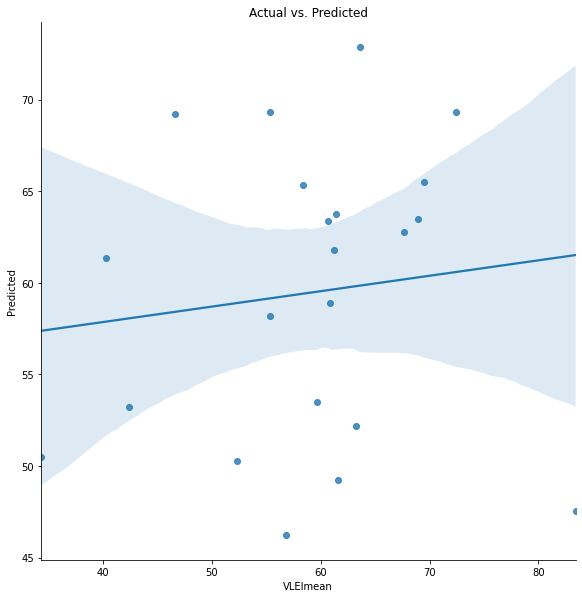

In [459]:
# Plotting the actual vs predicted values
sns.lmplot(x='VLEImean', y='Predicted', data=df_results, height=8)
plt.title('Actual vs. Predicted')